# **Linear regression**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
class Linear_regression:
    def __init__(
        self, learning_rate=0.001, iterations_quant=1000, reg_coefficient=0.001
    ):
        """This is a linear regression model class"""

        self._learning_rate = learning_rate
        self._iterations_quant = iterations_quant
        self._reg_coefficient = reg_coefficient
        self.w = None
        self.bias = None

    def fit(self, X, Y):
        """This function we need for training the model on the training set"""

        self._X = X
        self._Y = Y
        self._df_rows_quant, self._df_columns_quant = self._X.shape
        self.w = np.random.rand(self._df_columns_quant)
        self.bias = 0

        for i in range(self._iterations_quant):
            some_predict = self.predict(self._X)
            transposed_X = np.transpose(self._X)
            err = some_predict - self._Y

            d_w = 2 * np.dot(transposed_X, err) / self._df_rows_quant
            d_bias = 2 * np.sum(some_predict - self._Y) / self._df_rows_quant

            self.w -= self._learning_rate * (d_w + 2 * self._reg_coefficient * self.w)
            self.bias -= self._learning_rate * d_bias

    def predict(self, X):
        """This function predicts the values for the sample that was passed as an argument"""

        return np.dot(X, self.w) + self.bias

In [3]:
df = pd.read_csv(
    "D://ADMP_Anastasia/machine_learning/datasets/dataset_for_linear_regression.csv"
)
df

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-2.000000,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,-0.270671
1,-1.988848,3.955515,-7.866916,15.646097,-31.117701,61.888365,-123.086526,-0.272180
2,-1.977695,3.911278,-7.735316,15.298097,-30.254972,59.835113,-118.335613,-0.273689
3,-1.966543,3.867290,-7.605192,14.955935,-29.411485,57.838944,-113.742755,-0.275198
4,-1.955390,3.823551,-7.476535,14.619545,-28.586917,55.898581,-109.303545,-0.276706
...,...,...,...,...,...,...,...,...
265,0.955390,0.912771,0.872052,0.833150,0.795984,0.760475,0.726551,2.483714
266,0.966543,0.934205,0.902949,0.872739,0.843539,0.815317,0.788039,2.540886
267,0.977695,0.955888,0.934567,0.913722,0.893341,0.873415,0.853934,2.599029
268,0.988848,0.977820,0.966914,0.956131,0.945468,0.934924,0.924497,2.658156


In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=1 / 5, random_state=42
)

X_test_len = len(X_test)
Y_test_len = len(Y_test)
Y_test = Y_test.reshape(-1, 1)

In [6]:
model = Linear_regression(0.0001, 200000)
model.fit(X_train, Y_train)

In [7]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(-1, 1)

In [8]:
w_list = list(model.w)
bias = model.bias

print("bias after training:", bias, "\n")

for i, w_i in enumerate(w_list):
    print("w_{} =".format(i + 1), w_list[i])

bias after training: 0.08456047396315819 

w_1 = 0.9801545109544852
w_2 = 0.4688596203850278
w_3 = -0.1460976951624356
w_4 = 0.24973727127382728
w_5 = 0.8033896954210369
w_6 = 0.5729249337199911
w_7 = 0.1286406177612159


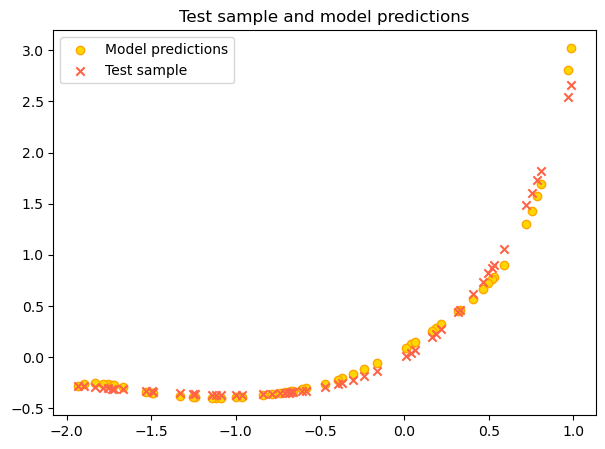

In [9]:
graph_X_values = X_test[:, 0]
graph_Y_test_values = Y_test
grapg_Y_pred_values = Y_pred

figure, ax = plt.subplots()

figure.set_figwidth(7)
figure.set_figheight(5)

ax.set_title("Test sample and model predictions")

ax.scatter(
    graph_X_values,
    grapg_Y_pred_values,
    color="gold",
    edgecolors="orange",
    label="Model predictions",
)
ax.scatter(
    graph_X_values, graph_Y_test_values, color="tomato", label="Test sample", marker="x"
)

ax.legend()

plt.show()

In [10]:
mean_squared_error_value = mean_squared_error(Y_test, Y_pred)
mean_squared_error_value

0.008207501231078709

In [11]:
test_df = pd.DataFrame(
    np.concatenate((X_test, Y_test), axis=1),
    columns=["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"],
)
test_df.head()

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-1.665428,2.773649,-4.619311,7.693128,-12.812346,21.338034,-35.536949,-0.314949
1,-0.706320,0.498888,-0.352374,0.248889,-0.175795,0.124167,-0.087702,-0.348538
2,-1.118959,1.252069,-1.401015,1.567678,-1.754168,1.962842,-2.196340,-0.365474
3,-0.583643,0.340639,-0.198812,0.116035,-0.067723,0.039526,-0.023069,-0.325592
4,0.185874,0.034549,0.006422,0.001194,0.000222,0.000041,0.000008,0.223842


In [12]:
pred_df = pd.DataFrame(
    np.concatenate((X_test, Y_pred), axis=1),
    columns=["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"],
)
pred_df.head()

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-1.665428,2.773649,-4.619311,7.693128,-12.812346,21.338034,-35.536949,-0.290943
1,-0.706320,0.498888,-0.352374,0.248889,-0.175795,0.124167,-0.087702,-0.341571
2,-1.118959,1.252069,-1.401015,1.567678,-1.754168,1.962842,-2.196340,-0.396213
3,-0.583643,0.340639,-0.198812,0.116035,-0.067723,0.039526,-0.023069,-0.304494
4,0.185874,0.034549,0.006422,0.001194,0.000222,0.000041,0.000008,0.282507
